In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv(r'car_evaluation.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [7]:
categorical_columns = df.select_dtypes(include="object").columns.tolist()
df_encoded = df.copy()

for col in categorical_columns:
  dic = {}
  unique_values = df[col].unique()
  value = 0
  for unique in unique_values:
    dic[unique] = value
    value += 1
  df_encoded[col] = df_encoded[col].map(dic)

<Axes: >

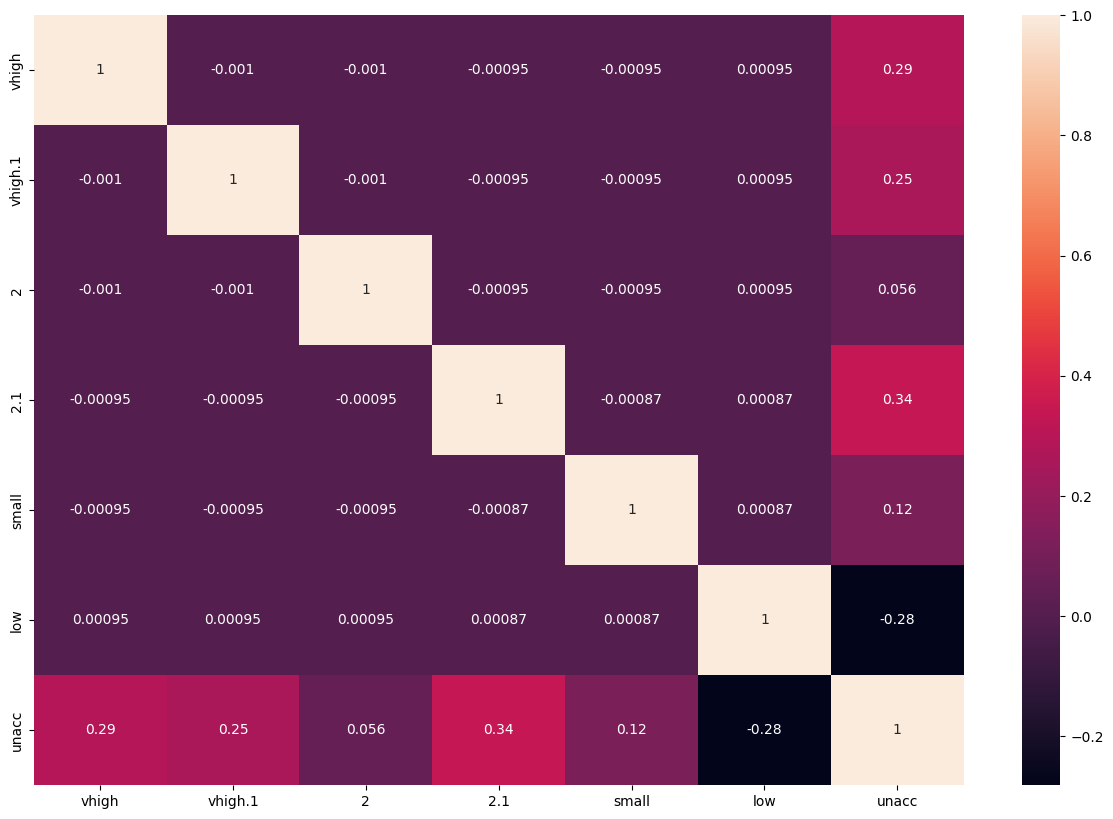

In [8]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

features = ['2.1', 'vhigh', 'low', 'vhigh.1']
x = df_encoded[features]
y = df_encoded['unacc']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ",accuracy)

Accuracy:  0.8402777777777778


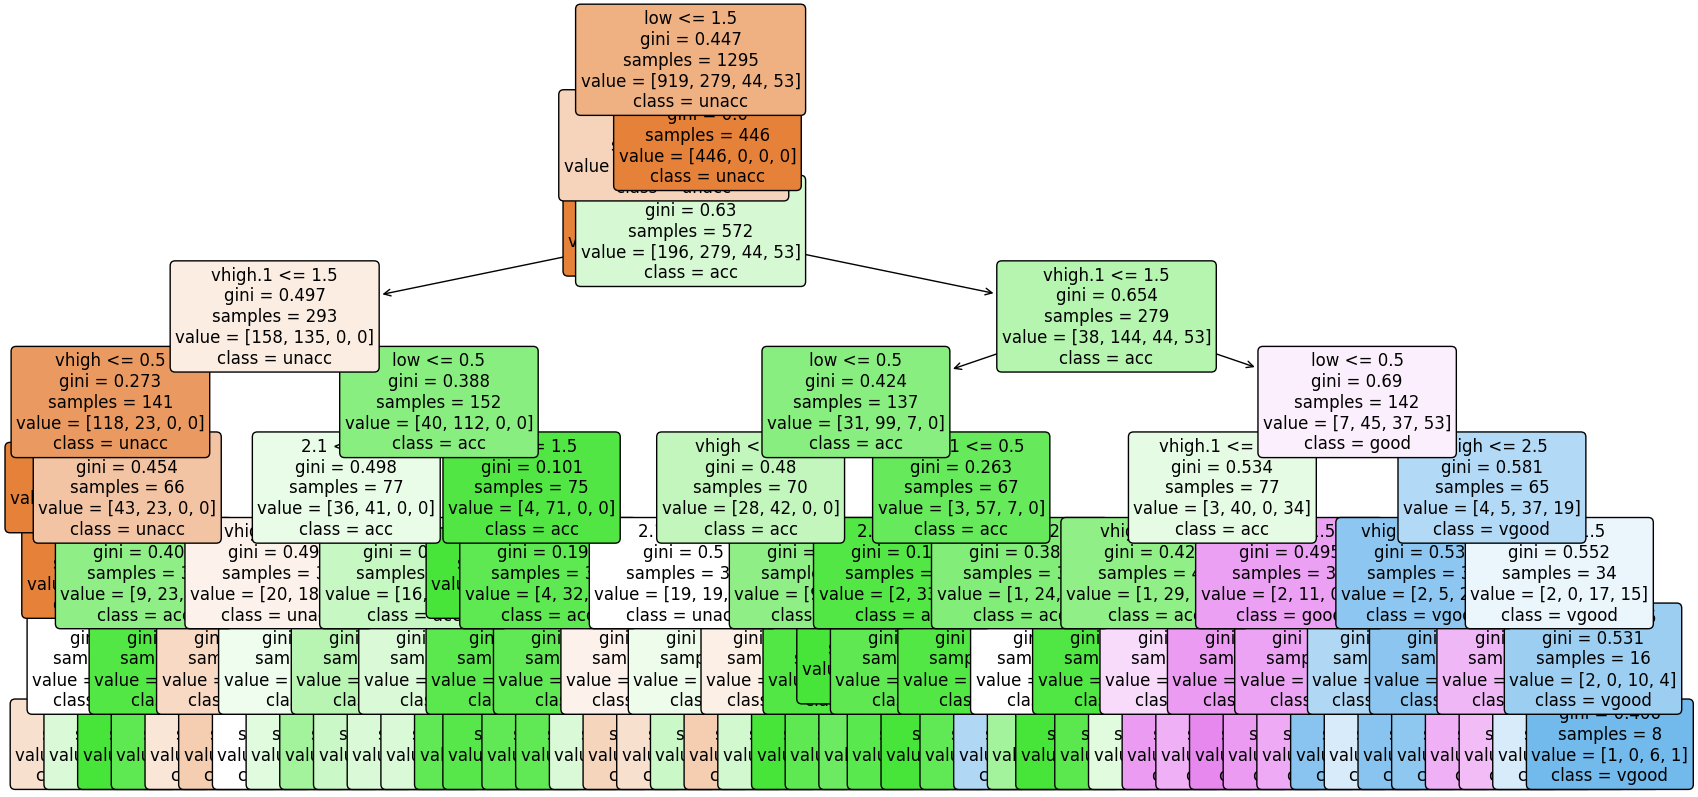

In [15]:
from sklearn import tree

plt.figure(figsize=(20, 10))  
tree.plot_tree(dtc, filled=True, feature_names=features, class_names=df['unacc'].unique(), rounded=True, fontsize=12)
plt.show()